In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from GP_comp.GP import generate_grids
from SGLD_v7 import SgldBayesianRegression as V7, select_significant_voxels
from models.neural_network import NeuralNetwork
from simulate_single_modality import simulate_data
from utils import generate_linear_data, plot_mse, plot_sigma_squared, plot_sigma_theta_squared

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [2]:
in_feature = 3
# Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n=1000, in_features=in_feature, noise_std=1.0)
model=NeuralNetwork()

In [3]:
# Run SGLD
c = V7(
    model=model,
    step_size=0.00001,
    num_epochs=300,
    burn_in_epochs=250,
    batch_size=100,
)

In [4]:
c.train(X, y)
inputs = torch.ones(in_feature)
print(f'true_weight={true_weights} true_bias={true_bias}')
print(f'X={inputs} Y(predicted)={c.predict(inputs)} Y(expected)={sum(true_weights) + true_bias}')

Epoch 1/300
time elapsed 0.00013899803161621094 seconds
Epoch 101/300
time elapsed 1.5636022090911865 seconds
Epoch 201/300
time elapsed 3.1418139934539795 seconds
true_weight=tensor([1., 2., 3.]) true_bias=-1.0
predict (sample_avg)::variance_prediction=[80.12588]
X=tensor([1., 1., 1.]) Y(predicted)=tensor([39.4910]) Y(expected)=5.0


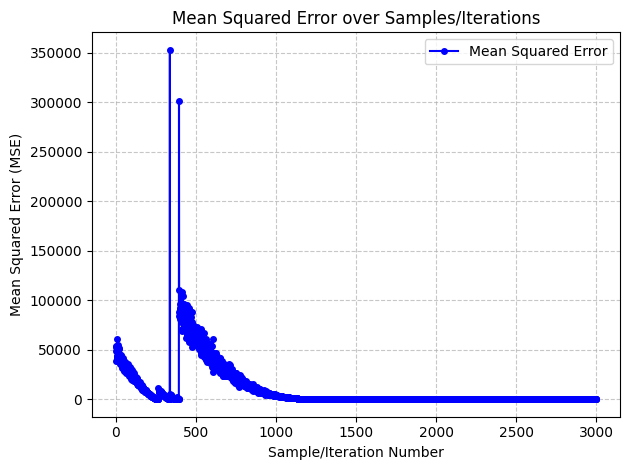

In [5]:
plot_mse(c)

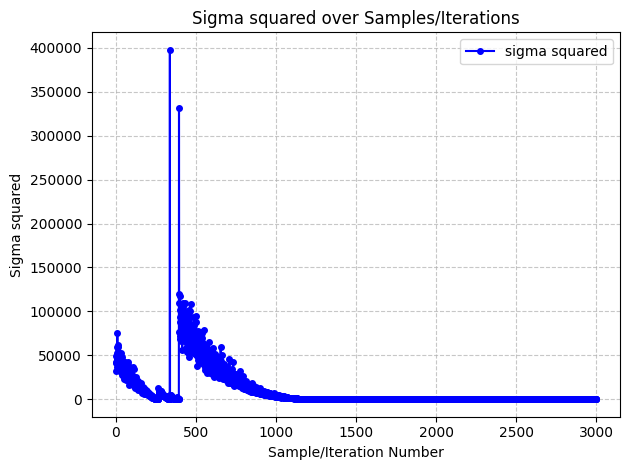

In [6]:
plot_sigma_squared(c)

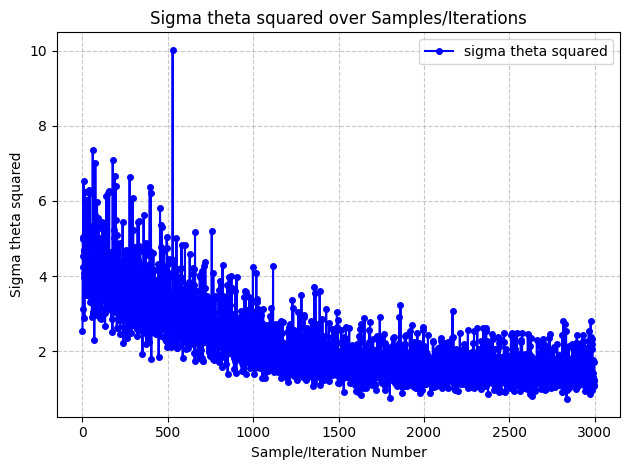

In [7]:
plot_sigma_theta_squared(c)

In [8]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 38


In [9]:
print(f'X={inputs} Y(predicted)={c.predict(inputs, -500,-1)} Y(expected)={sum(true_weights) + true_bias}')

predict (sample_avg)::variance_prediction=[0.318979]
X=tensor([1., 1., 1.]) Y(predicted)=tensor([5.0070]) Y(expected)=5.0
